# Taller de problemas


## Trabajo del fin de Semana
1. Utilizando BeautifulSoup4; scrappea una página de mercado libre con las propiedades: (Nombre del producto, Precio, Precio original, numero de ventas). 
2. Ahora transforma los datos númericos para que sean de type(int) o type(float) en lugar de string 
3. Con esos datos, genera un dataframe.
4. Crea una nueva columna en donde conviertas el precio en pesos a dólares (1 dólar=20 pesos).
5. Guarda el dataframe en un archivo csv.
6. Usando BS4, crea una manera de acceder a las siguientes 2 páginas del departamento en donde te encuentres. (Mercadolibre con las mismas variables).
7. Scrappea las 3 páginas para tener una lista más grande.
8. Nuevamente transforma los datos numéricos para que sean int o float en lugar de string.
9. Genera un dataframe.
10. Crea una nueva columna en donde conviertas el precio de pesos a dólares (1 dólar=20 pesos).
11. Muestra un histograma de la distribución de los precios de celulares.


        

In [95]:
#importing what is neccesary

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np

In [2]:
#i made this function to take the data i need from one page
def soupByPage(page):
    
    souped_page = BeautifulSoup(requests.get(start_page).text, "lxml")
    items_raw = souped_page.find_all('li', class_='results-item')
    
    products_names = []
    products_prices = []
    products_installment_prices = []
    products_free_shipment = []
    
    for index,item in enumerate(items_raw):
        
        #get the name of the product
        name = item.find('span',class_='main-title').get_text().strip()
        #get the price
        price = float(item.find('span',class_='price__fraction').get_text().replace(",",""))
        
        #get the monthly payment if available
        installment_price_raw = item.find('span',class_='item-installments-price')
        if installment_price_raw != None:
            installment_price = float(installment_price_raw.get_text().replace("$","").replace(",","").strip().replace(" ","."))
        else:
            installment_price = np.nan
        
        #get if the product has free shipment
        free_shipment_raw = item.find('span',class_='stack-item-info')
        if free_shipment_raw != None:
            free_shipment = True
        else:
            free_shipment = False
        
        products_names.append(name)
        products_prices.append(price)
        products_installment_prices.append(installment_price)
        products_free_shipment.append(free_shipment)
        
    items = {"product_name":products_names,
            "product_price":products_prices,
            "product_installment_price":products_installment_prices,
            "product_free_shipment":products_free_shipment}
    
    items_dataframe = pd.DataFrame(items)
    
    return items_dataframe



In [3]:
#i made this function that what it does is that gets the next page link of the page given
def soupNextPage(current_page):
    souped_page = BeautifulSoup(requests.get(current_page).text, "lxml")
    links_raw = souped_page.find_all('a',class_="andes-pagination__link")
    all_links = [link.attrs.get("href").strip() for link in links_raw]
    return all_links[len(all_links) - 1]


In [4]:
#this function gets the first page then it loops if it has other pages to scan gets the next page from 'soupNextPage' and then
#concatenates the dataframes for some reason i coudnt know append dint work 
def soupPages(start_page,pages):
    pages_dataframe = soupByPage(start_page)
    next_page = soupNextPage(start_page)
    x = 1
    while x < pages:
        items_dataframe = soupByPage(next_page)
        pages_dataframe = pd.concat([pages_dataframe,items_dataframe])
        next_page = soupNextPage(next_page)
        x = x + 1
        
    return pages_dataframe

In [5]:
#execute the task
start_page = 'https://celulares.mercadolibre.com.mx/#menu=categories'
pages_dataframe = soupPages(start_page,5) #dont forget to type how many pages you want

#since append dint work i just reindexed the dataframe
pages_dataframe.index = range(len(pages_dataframe))
#convert to usd and add to column
pages_dataframe['product_price_usd'] = pages_dataframe['product_price'] / 20


In [6]:
pages_dataframe

,product_name,product_price,product_installment_price,product_free_shipment,product_price_usd
0,Xiaomi Redmi Note 8 Dual SIM 64 GB Neptune blu...,3861.0,321.74,True,193.05
1,Motorola One 64 GB Blanco 4 GB RAM,3798.0,316.50,True,189.90
2,Motorola G8 Plus 64 GB Cosmic blue 4 GB RAM,5794.0,482.83,True,289.70
3,Apple iPhone 7 32 GB Negro mate 2 GB RAM,5309.0,442.43,True,265.45
4,Huawei P30 Lite Dual SIM 128 GB Peacock blue 4...,5169.0,510.65,True,258.45
...,...,...,...,...,...
266,Motorola G7 Plus 64 GB Índigo 4 GB RAM,4259.0,354.92,True,212.95
267,Huawei Y7 2019 Dual SIM 32 GB Negro medianoche...,3549.0,295.75,True,177.45
268,Motorola One One Action Dual SIM 128 GB Denim ...,5220.0,435.00,True,261.00
269,Apple iPhone X 256 GB Gris espacial,12449.0,1037.00,True,622.45


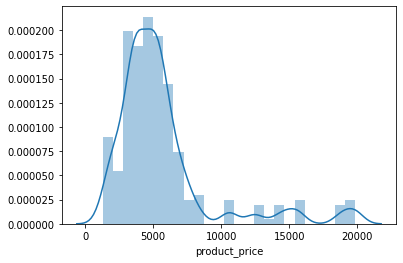

In [7]:
#of course i had to google this how to get distribution histograms on python interesting excercice
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(pages_dataframe['product_price'])